# Spiral Animation \###

In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_path, theme, theme_void, lims
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc

rc("animation", html="html5")

### Spiral Animation

*How to create Animations*

The `PlotnineAnimation` methods takes a sequence of plots and animates
them. The best way to create the sequence is to use a function that
generates plots.

**NOTE**: When creating the plots make sure *all the plots* have scales
with the same limits for each aesthetic, including the `x` and `y`
aesthetics.

In [2]:
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)


def plot(k):
    # For every plot we change the theta
    _theta = theta * k

    # Polar Equation of each spiral
    r = tightness * _theta

    df = pd.DataFrame({
        "theta": _theta,
        "r": r,
        "x": r * np.sin(_theta),
        "y": r * np.cos(_theta)
    })

    p = (
        ggplot(df)
        + geom_path(aes("x", "y", color="theta"), size=1)
        + lims(
            # All the plots have scales with the same limits
            x=(-130, 130),
            y=(-130, 130),
            color=(-kmax * np.pi, kmax * np.pi),
        )
        + theme_void()
        + theme(
            aspect_ratio=1,
            # Make room on the right for the legend
            subplots_adjust={"right": 0.85},
        )
    )
    return p


# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQACmxVtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
CHNliIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAVHyAAAADAAAaRRPlmhscIYjQAAAF7AEb
Bkw5Aogi4hAjlW++GLkqcAVDNSlldmhDANjpeE0p+lpU3TEY2cqsZEoJHqIE6uct0SNAEsKaWNys
RI6HURC1I946MqIRWxZ2awIaEsR8lTTbX/5hBer4yYiWyI/pkaAQ8WHQ9cAJZIIkeuY6gFUDotm/
MpR1szEaR1y+RBGnwM/KEynKVRroBCOsyF2T5K06OhSTuwTJTAuBYPFfAEVWlMV85wJmJ7CFGKvX
uppdSQwh+LkvLL/bdIhFq2atitMReZvyitNm/cWDZIfigYX6znjlfzOMOxgaKYrxf6W1BFxiJmRR
4KU18EABgK7qt/o7f8/9MbD0qJEQakiRYKne8i8Ecunjoq5EHCk2nYow5Zco6KpI0ohgNDsPFvgw
pECogllC8yaZzh0yvMcLuPVrLX6jcW+uMrajCGn3ulCe5QPpTjtJxcFViGasGq3mLtkbSQa91B2U
GJ80ct/3sbKbvZhplB1n601G50gI2RD9/vRJXJfee8VNDzawhZfUpZOTOiL77oBwhVH2vtS5iNSR
0V7WhzAqDwrQnI5j+LtE+7JtD6CpYfSaOmHafWYm/f8pJH8uqEtyVGVeA87kFW6Cl4UZ4Kf4Hrl+
caqU4flX8n4LVvNvmmqpjHBVnuYlU9aGpPx8DlGDreS1oHe0wquwtui/1G27vfzYm+r0wmDE/MX6
aQLtyqqibbvnDkXh1vuynx18ER4RE5LpgrXVt2w74RAJXuanyOeQgPAeMiY3+lbBKshWSj3Brv6J
Jhb1vRhw6bG0KqnZLJ/kfNt6bg3eyanhdL1DFik+IgAzW9a3lCPpsc2yFJ8kW1KXNT2FU5aAeKUr
+tKfsFN4VqGnZFPiZEh6gOVypJORZ4WLiRG7GCezAtLCyN8vSA5YiRPYlFNGWfJMQI90OqhjxNqN
8vWWjR8aA04wGJ30+/O/j6pcb07t8kbebM3DPLPLY4XquE3VH16J6bJIZ7/Fj6hc7t2fNMgGn/os
Ad6k7gJxaXmZiQH+OS1uHV6TVDMI9ze8L9+ZXtIXcNaxu5ud5mhCxmDyGT8/q1INmQjeKEJVaJdC
sgJnv2i4QVFnmepOtfw7sdehqD36tObFJaaUYjqEvm41Nv+p2d+eln0tmC4qxiWESjvmiqVfybhS
BAA2hY5V8man3dhdoXtyNGfqLRdlHrj4oVxfnu2iURMetXIco81bB7oC5h4wFOEzNcdzsZCYpFQk
Fdu0Qopj9F+Skf8fY0q/Wa21+CzVvxMfMVpJIAm2oEGeyrf3/ec9MtBwgHqGc2AEvZR9C9zse5e1
cHMDwoskTQM3qpASYSmHlLuZ9whb8G/05suG5s7pgcXa/lqg88FyBu8WpgUk0Sn9aHvnl7EYIylC
XjgWR08+qZ2mZecS0yYoid5vK0yWMH83+TeV6WEq2UqmrP/+siuEZ0rrJ7qUXZv47mqq5bk/4puJ
IwgbaSbG19w0AMyZhTEWA+kzRN4Nru8r4f/U9MdPdTn9K1icGGBsSi935wC7Syvf9JDhyJTk/YqH
7GWeY1HwDWblyLZX6qnYydHUK0iIhu/PSaOqf6MQVHEY/fN0Qsrr5uNFV7PnUFTYFRpnigtzunFT
lcH1RzltjZUYO1ejKhfPCsEPLvDWG4n5QR0JQVy7Ajf9FBiFFWJ33DYTf/ahFdTOnlQ6FGHqUP8X
ZW1RKiK1bcWz3j7IzZup6sbLwR090BOGXnCUMOSNMk3XqFTqCg+sZUPtEgMFnmqvFeuvxxVFlcZ4
6tD/gUlA9/21knE3QhpTN6jsPnKW6Qbs5ygT+Qjb7WYPbJ6cWwYRsyug+1vzJ6aFM7ZLeKNfGSCM
AAADAAFyBHX8+1VEp9Txcp1LagyzKernZICiwYgNYt28AjiWkgulh5tF39KlinSa18LYL6EhjHUX
d/HyMXVJfR4QuAHaTowONjPkQUAcSVasOR3MhrcFn39jNEznOhoh81tiRsvTUdqnzpvgtd01yWvW
mV5wYpxoykDfasopeafFAQ4xDWKZVVe5XwtAHJiNobdSkAHYP5edJCAsB3TAKDFw8xoQr7MtiOEY
nqX5UBTObsgpGPdOaGC4e92/VT3OD1zylFov67sXovhcvfccK2DvpgAAAwAEH5BosGhf8IsiCu4Q
l2/+jiD1qAyNh3tySigVaIgg+aR++3JcQ1AVuaeRK2OQAqXsMcBqgDTcZ2q+ypG2RjvRhdeQfZ44
LL8Pc3me0qEz81qLGhvzwu+LvjKJpQZdnQYf4ctxYtw+DLQwCjvTnpSkhf1IhgDnQYZ4gAysAIOv
wJFWdCuBKcs++VQpmtUCd//U4A4pFKV+U0BEVVE8RQHNBieBlpadcEAWghHKeQedvn7KDTCBkJtK
31DczbwAHmGKLSHapy3j2H6zJvebHispK8U0nR4J1SL6e3xdWidvUxNzEiH6BNa1DApkeew1YRoK
oaENkk4jPuKpcyjPiZACMXjGJqpjk99JFQJZAoQu0jKix5RVFsy3jeXEMgXugHAVPte4MkltKA+v
k/ZXZUXh/Z00N8wtP8aqWT9R1g/K2RhoN1VvSXOJP5peERVOGKrSd02RSdahenoPpp2uVThJ1piv
8qSvrqBzzWAMAyaJ/4s3Og5mV96IsjQwDlokZP9NzhUe8exy8QJF/ZjehzdeD6JYfsz8qAF91+jK
+b+Mhs2sZ6Cs2jITgZ9TUuqNIcZ69ZvEJiiuZDngiqyiMXgfzWO00xx9Rdj3qvweTJw+Xg+gqMjb
1foWuWz1I0Rz57SfZu5XJon/CDsh0t7Jxf1dsQA++3yfGwKi4zx2mg4PPg+s34I58ZJhf0+A+IEA
AAY8QZokbEO//qmWAAADA

The final image of the spiral

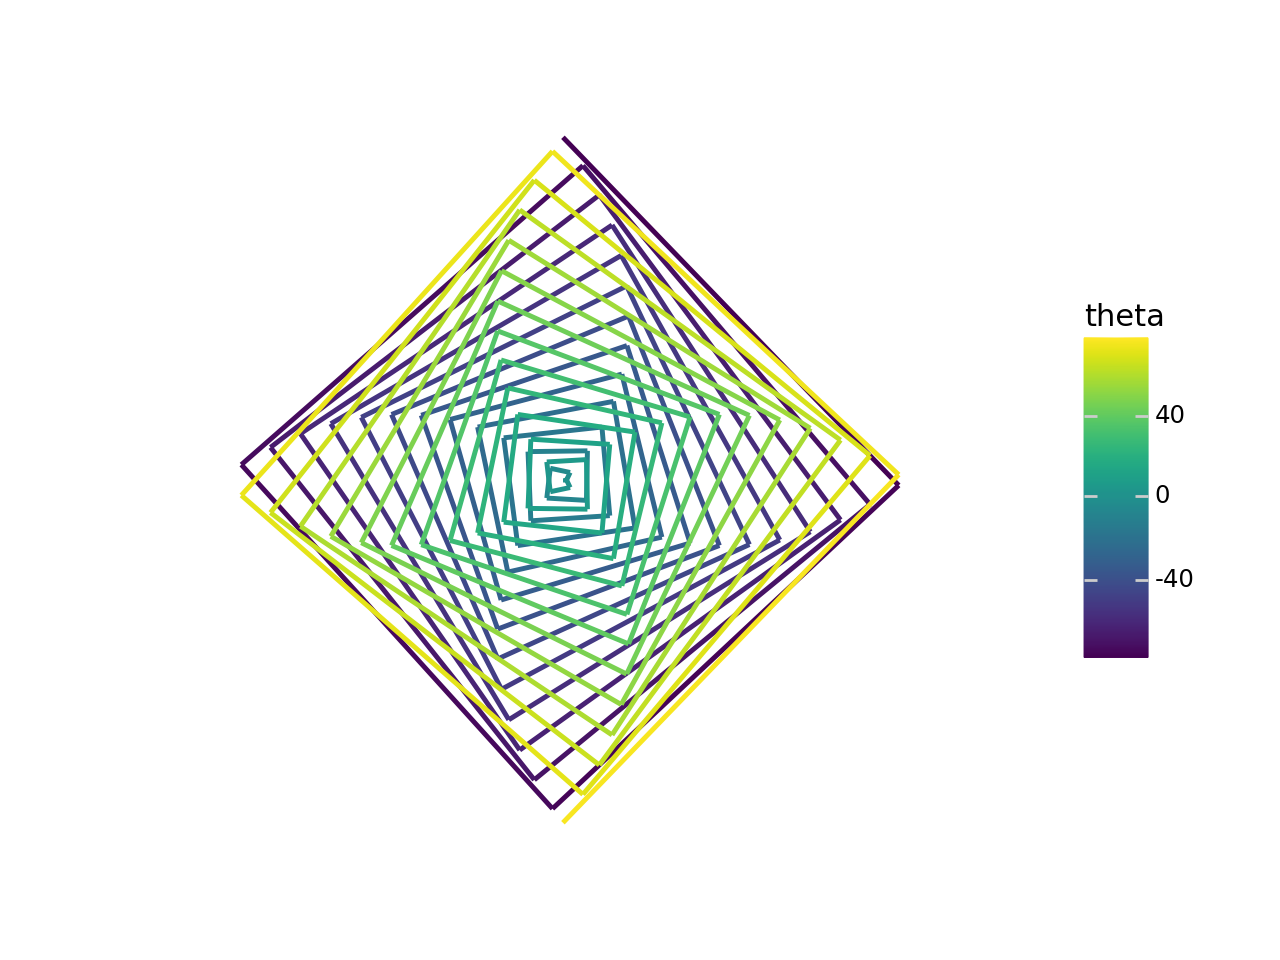

In [3]:
# Gallery Plot

plot(kmax)